In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from neuralforecast.core import NeuralForecast
from neuralforecast.models import NHITS, NBEATS, TimesNet

from neuralforecast.losses.pytorch import MAE
from neuralforecast.losses.numpy import mae, mse

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [2]:
df = pd.read_csv('data/daily_min_temp.csv')
df['Date'] = pd.to_datetime(df['Date'])

df.head()

,Date,Temp
0,1981-01-01,20.7
1,1981-01-02,17.9
2,1981-01-03,18.8
3,1981-01-04,14.6
4,1981-01-05,15.8


In [3]:
df['unique_id'] = 0
df = df.rename(columns={"Date": "ds", "Temp": "y"})

df = df[['unique_id', 'ds', 'y']]

df.head()

,unique_id,ds,y
0,0,1981-01-01,20.7
1,0,1981-01-02,17.9
2,0,1981-01-03,18.8
3,0,1981-01-04,14.6
4,0,1981-01-05,15.8


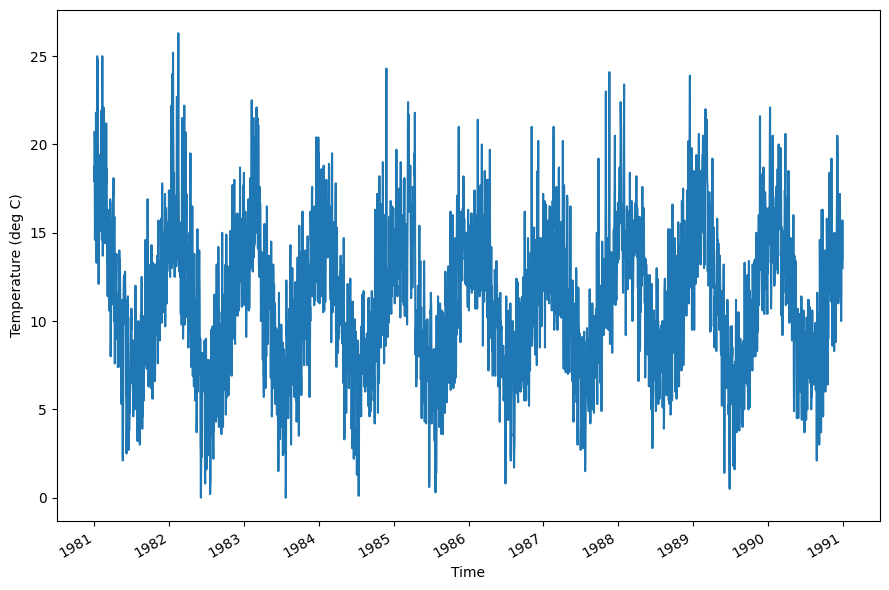

In [4]:
fig, ax = plt.subplots(figsize=(9,6))

ax.plot(df['ds'], df['y'])
ax.set_xlabel('Time')
ax.set_ylabel('Temperature (deg C)')

fig.autofmt_xdate()
plt.tight_layout()

## Modeling 

In [5]:
# Set horizon and models
horizon = 365

# models
models = [
    NHITS(h=horizon, input_size=horizon, max_steps=2),
    NBEATS(h=horizon, input_size=horizon, max_steps=2),
    TimesNet(h=horizon, input_size=horizon, max_steps=2)
]



Seed set to 1
Seed set to 1
Seed set to 1


In [6]:
# initialise object
nf = NeuralForecast(models=models, freq='D')

In [7]:
preds_df = nf.cross_validation(df=df[-731:], step_size=horizon, n_windows=1)

2024-04-11 13:01:43.569345: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Predicting: |          | 0/? [00:00<?, ?it/s]

Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Predicting: |          | 0/? [00:00<?, ?it/s]

Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Predicting: |          | 0/? [00:00<?, ?it/s]

In [8]:
preds_df.head()

,ds,cutoff,NHITS,NBEATS,TimesNet,y
unique_id,,,,,,
0,1990-01-01,1989-12-31,3.892440,-12.450748,12.279378,14.8
0,1990-01-02,1989-12-31,6.722919,3.805067,15.269792,13.3
0,1990-01-03,1989-12-31,8.167788,5.894691,12.627604,15.6
0,1990-01-04,1989-12-31,11.000558,6.694252,7.627776,14.5
0,1990-01-05,1989-12-31,11.986809,10.828639,12.824898,14.3


## Evaluation 

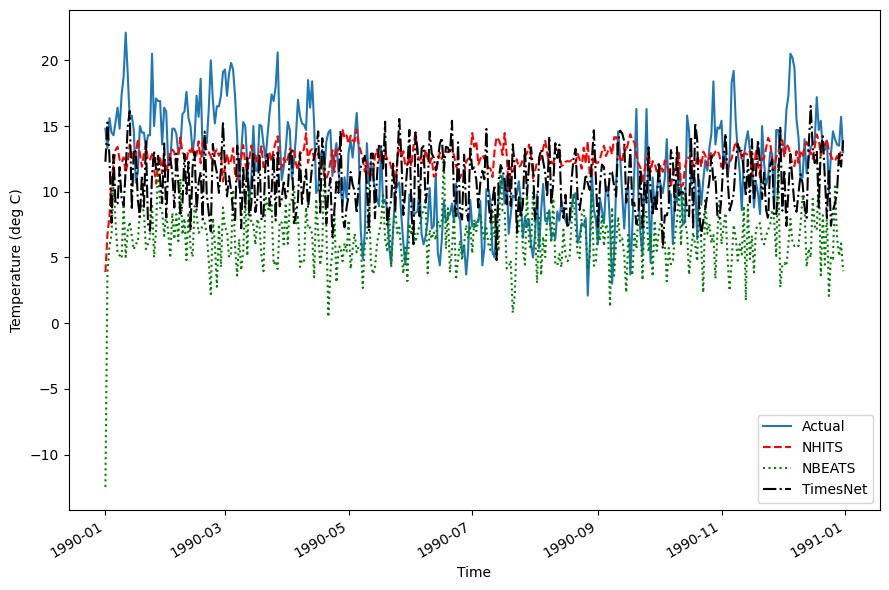

In [9]:
fig, ax = plt.subplots(figsize=(9,6))

ax.plot(preds_df['ds'], preds_df['y'], label='Actual')
ax.plot(preds_df['ds'], preds_df['NHITS'], label='NHITS', ls='--', color='red')
ax.plot(preds_df['ds'], preds_df['NBEATS'], label='NBEATS', ls=':', color='green')
ax.plot(preds_df['ds'], preds_df['TimesNet'], label='TimesNet', ls='-.', color='black')

ax.legend(loc='best')
ax.set_xlabel('Time')
ax.set_ylabel('Temperature (deg C)')

fig.autofmt_xdate()
plt.tight_layout()

In [10]:
data = {'N-HiTS': [mae(preds_df['NHITS'], preds_df['y']), mse(preds_df['NHITS'], preds_df['y'])],
       'N-BEATS': [mae(preds_df['NBEATS'], preds_df['y']), mse(preds_df['NBEATS'], preds_df['y'])],
       'TimesNet': [mae(preds_df['TimesNet'], preds_df['y']), mse(preds_df['TimesNet'], preds_df['y'])]}

metrics_df = pd.DataFrame(data=data)
metrics_df.index = ['mae', 'mse']

metrics_df.style.highlight_min(color='lightgreen', axis=1)

,N-HiTS,N-BEATS,TimesNet
mae,3.302362,5.587334,3.854341
mse,16.318527,46.469534,21.423211
